# Modelo lineal generalizado (GLM)

Ejemplo con regresión de Poisson

La regresión Poisson es parte de los modelos lineales generalizados (GLM) y se utiliza cuando la variable de respuesta son conteos, unidades discretas no negativas. Ejemplos de datos para una regresión de Poisson:

* El número de hijos por mujer.
* El número de errores ortográficos en una frase de 100 palabras
* El número de animales muertos en la carretera por una distancia especifica
* El número de mutaciones en una cadena de ADN
* El número de estudiantes por salón
* El número de frutos por planta


https://stats.idre.ucla.edu/r/dae/poisson-regression/. The data is from the number of awards earned by students at one high school. Predictors of the number of awards earned include the type of program in which the student was enrolled (e.g., vocational, general or academic) and the score on their final exam in math.

* `num_awards` is the outcome variable and indicates the number of awards earned by students at a high school in a year,
* `math` is a continuous predictor variable and represents students’ scores on their math final exam, and
* `prog` is a categorical predictor variable with three levels indicating the type of program in which the students were enrolled. It is coded as 1 = “General”, 2 = “Academic” and 3 = “Vocational”.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import PoissonRegressor, LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.dpi'] = 110

In [2]:
df = pd.read_csv('https://stats.idre.ucla.edu/stat/data/poisson_sim.csv', index_col='id')
df.shape

(200, 3)

In [3]:
df.head()

,num_awards,prog,math
id,,,
45,0,3,41
108,0,1,41
15,0,3,44
67,0,3,42
153,0,3,40


In [4]:
df.prog = df.prog.astype('object')
df.dtypes

num_awards     int64
prog          object
math           int64
dtype: object

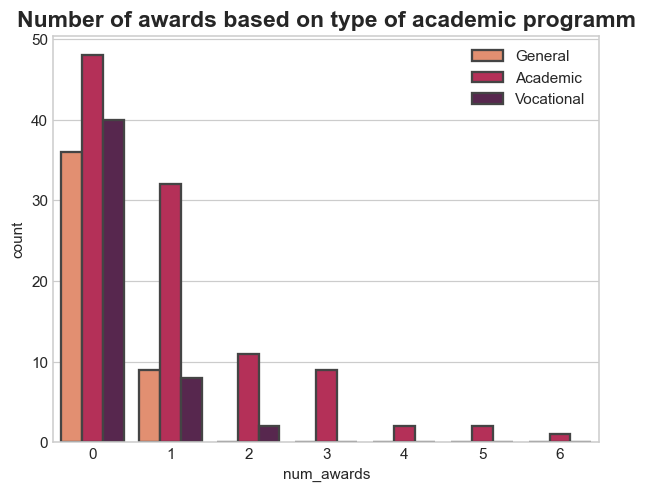

In [5]:
plt.title('Number of awards based on type of academic programm', fontsize=15, weight='bold')
sns.countplot(x=df.num_awards, hue=df.prog, palette="rocket_r", lw=1.5, edgecolor='#444444')
plt.legend(loc='upper right', labels=['General', 'Academic', 'Vocational'])

In [6]:
prog = pd.get_dummies(pd.to_numeric(df['prog'], errors='coerce'), prefix='prog')
prog[:15]

,prog_1,prog_2,prog_3
id,,,
45,0,0,1
108,1,0,0
15,0,0,1
67,0,0,1
153,0,0,1
51,1,0,0
164,0,0,1
133,0,0,1
2,0,0,1


In [7]:
df = pd.merge(df.drop('prog', axis=1), prog, on='id')

In [8]:
df

,num_awards,math,prog_1,prog_2,prog_3
id,,,,,
45,0,41,0,0,1
108,0,41,1,0,0
15,0,44,0,0,1
67,0,42,0,0,1
153,0,40,0,0,1
...,...,...,...,...,...
100,2,71,0,1,0
143,2,75,0,0,1
68,1,71,0,1,0


In [9]:
X = df[['prog_1', 'prog_2', 'prog_3', 'math']]
y = df['num_awards']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=81, test_size=.33)

In [11]:
model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print('R2 = {:.4f}'.format(r2))
print('MAE = {:.4f}'.format(mae))
print('RMSE = {:.4f}'.format(rmse))

R2 = 0.2294
MAE = 0.6699
RMSE = 0.9083


## Regresión Ridge

In [12]:
from sklearn.linear_model import Ridge

model = Ridge()

model.fit(X_train,y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print('R2 = {:.4f}'.format(r2))
print('MAE = {:.4f}'.format(mae))
print('RMSE = {:.4f}'.format(rmse))

R2 = 0.2286
MAE = 0.6701
RMSE = 0.9088


In [13]:
output = []
last_error =999

for i in range(1,101):
    iRidge = Ridge(alpha=i,tol=1e-6)
    iRidge.fit(X_train,y_train)
    y_pred = iRidge.predict(X_test)
    iRMS_error = mean_squared_error(y_test,y_pred,squared = False)
    if iRMS_error < last_error: best_alpha = i
    last_error = iRMS_error
    output.append(iRMS_error)

print("RMSE is minimised at \u03B1 =",best_alpha)

RMSE is minimised at α = 1


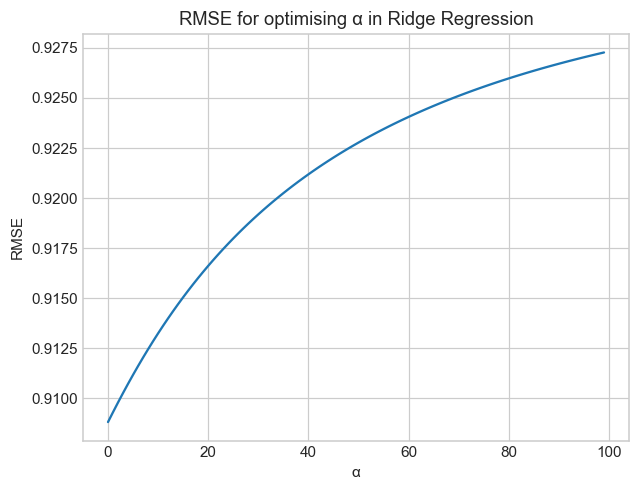

In [14]:
plt.plot(output)
plt.title('RMSE for optimising \u03B1 in Ridge Regression')
plt.xlabel('\u03B1')
plt.ylabel('RMSE')
plt.show()

## Regresión Poisson

In [15]:
model = PoissonRegressor(alpha=33)  # Optimisation is performed below

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print('R2 = {:.4f}'.format(r2))
print('MAE = {:.4f}'.format(mae))
print('RMSE = {:.4f}'.format(rmse))

R2 = 0.1851
MAE = 0.6922
RMSE = 0.9341


In [16]:
# Obtención del mejor valor para el parámetro alpha
output = []
last_error = 999

for i in range(1, 101):
    iPoisson_GLM = PoissonRegressor(alpha=i, tol=1e-6)
    iPoisson_GLM.fit(X_train, y_train)
    y_pred = iPoisson_GLM.predict(X_test)
    iRMS_error = mean_squared_error(y_test, y_pred, squared=False)
    if iRMS_error < last_error: best_alpha = i
    last_error = iRMS_error
    output.append(iRMS_error)

print("RMSE is minimised at \u03B1 =", best_alpha)

RMSE is minimised at α = 33


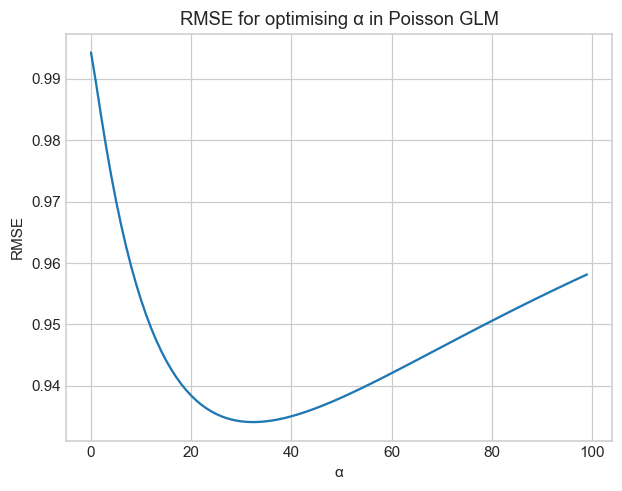

In [17]:
plt.plot(output)
plt.title('RMSE for optimising \u03B1 in Poisson GLM')
plt.xlabel('\u03B1')
plt.ylabel('RMSE')
plt.show()